In [1]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs  as go
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


In [ ]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
heart = pd.read_csv(r'heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
info=["age","1: male, 0: female","chestain type,1: typical angina,2: atypical angina,3: non-anginal pain,4: asymptomatic","resting blood pressure","serumcholestrol in mg/dl","fasting blood sugar>120 mg/dl","resting electrocardiographic results(values 0,1,2)","maximum heart rate acheived","exercise induced angina","oldspeak=ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flouroscopy","thal:3=normal;6=fixed defect;7=reversable defect"]
for i in range(len(info)):
    print(heart.columns[i]+";\t\t\t"+info[i])

age;			age
sex;			1: male, 0: female
cp;			chestain type,1: typical angina,2: atypical angina,3: non-anginal pain,4: asymptomatic
trestbps;			resting blood pressure
chol;			serumcholestrol in mg/dl
fbs;			fasting blood sugar>120 mg/dl
restecg;			resting electrocardiographic results(values 0,1,2)
thalach;			maximum heart rate acheived
exang;			exercise induced angina
oldpeak;			oldspeak=ST depression induced by exercise relative to rest
slope;			the slope of the peak exercise ST segment
ca;			number of major vessels (0-3) colored by flouroscopy
thal;			thal:3=normal;6=fixed defect;7=reversable defect


In [ ]:
heart.groupby('target').size()

target
0    138
1    165
dtype: int64

In [ ]:
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [ ]:
heart.size

4242

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart['target'].unique()

array([1, 0], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

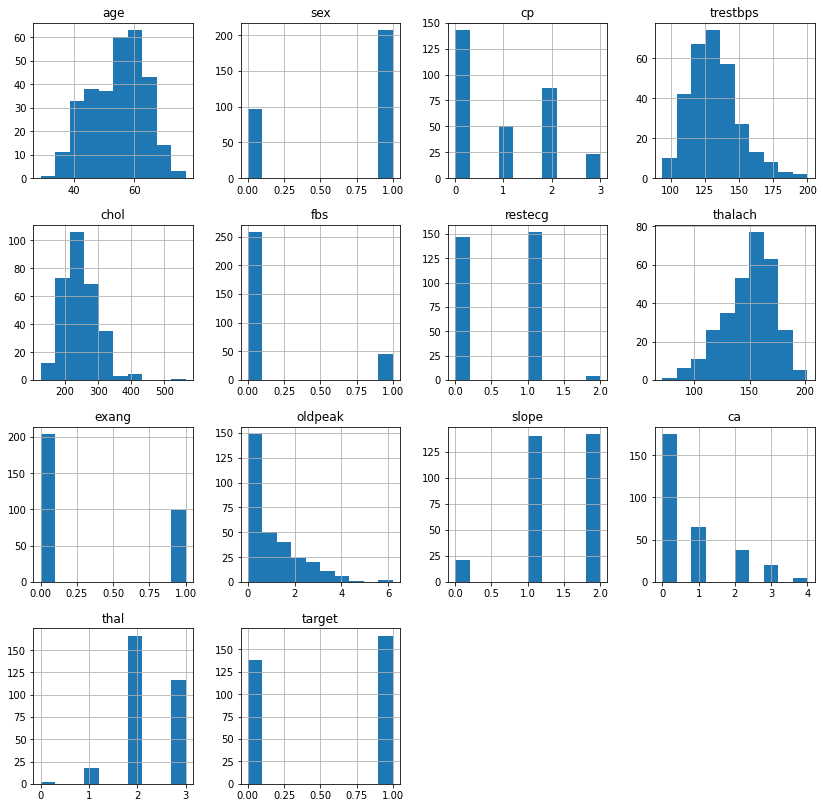

In [ ]:
heart.hist(figsize=(14,14))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

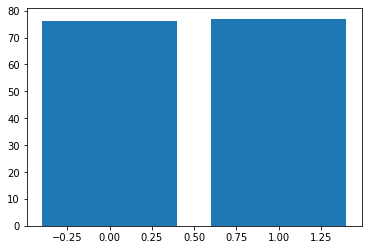

In [ ]:
plt.bar(x=heart['sex'],height=heart['age'])
plt.show

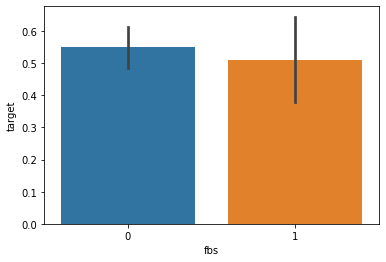

In [ ]:
sns.barplot(x='fbs',y='target',data=heart)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

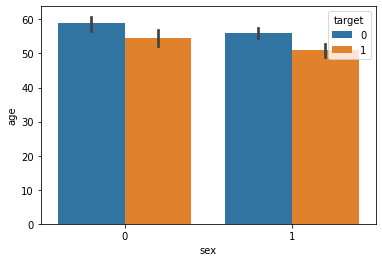

In [ ]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cp', ylabel='target'>

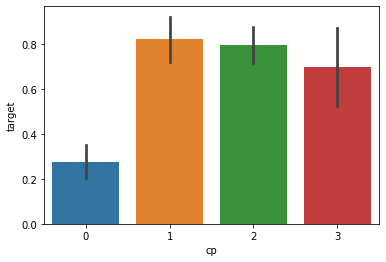

In [ ]:
sns.barplot(heart['cp'],heart['target'])

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sex', ylabel='target'>

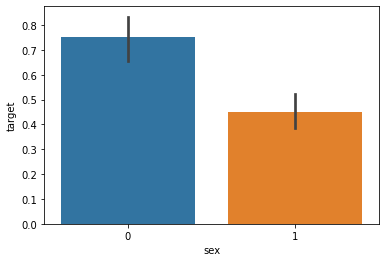

In [ ]:
sns.barplot(heart['sex'],heart['target'])

In [ ]:
px.bar(heart,heart['sex'],heart['target'])

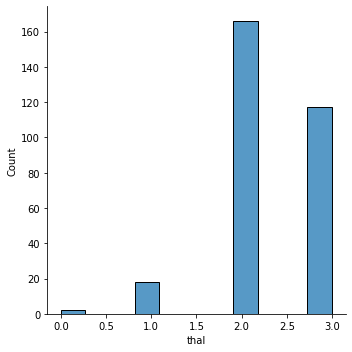

In [ ]:
sns.displot(heart['thal'])

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='chol', ylabel='Density'>

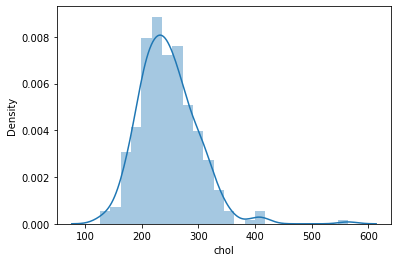

In [ ]:
sns.distplot(heart['chol'])

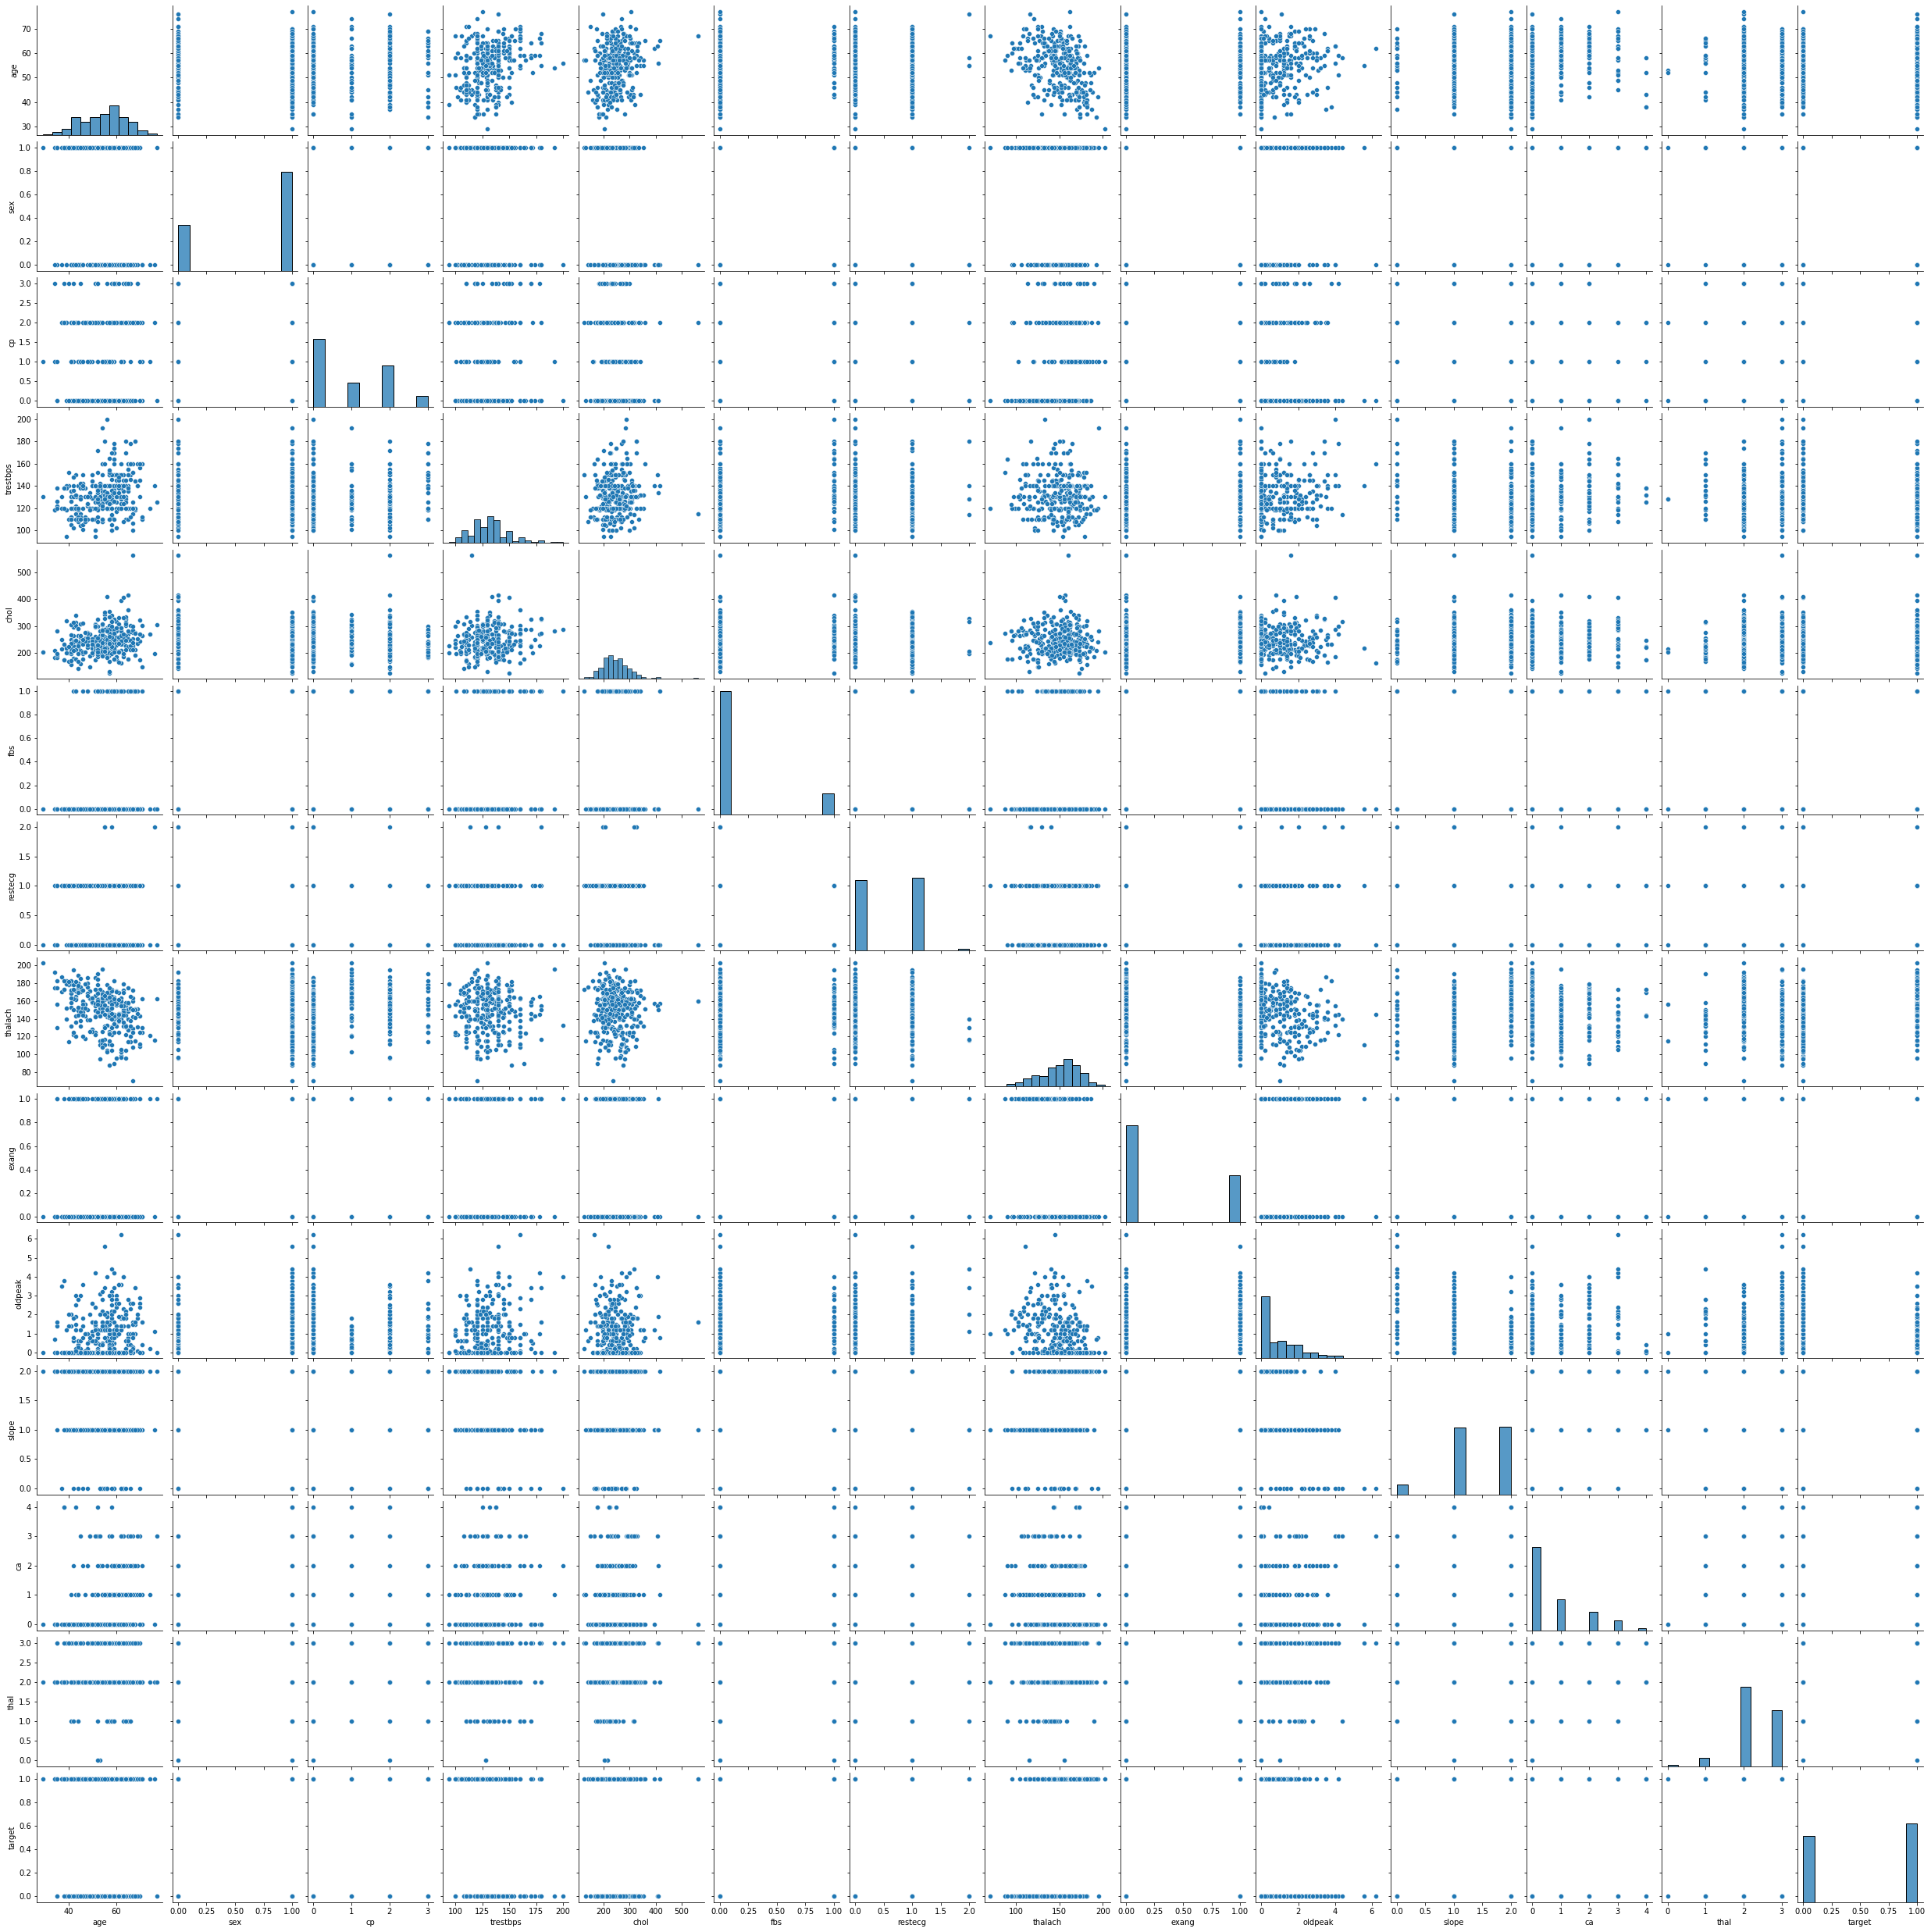

In [ ]:
sns.pairplot(heart)
plt.show()

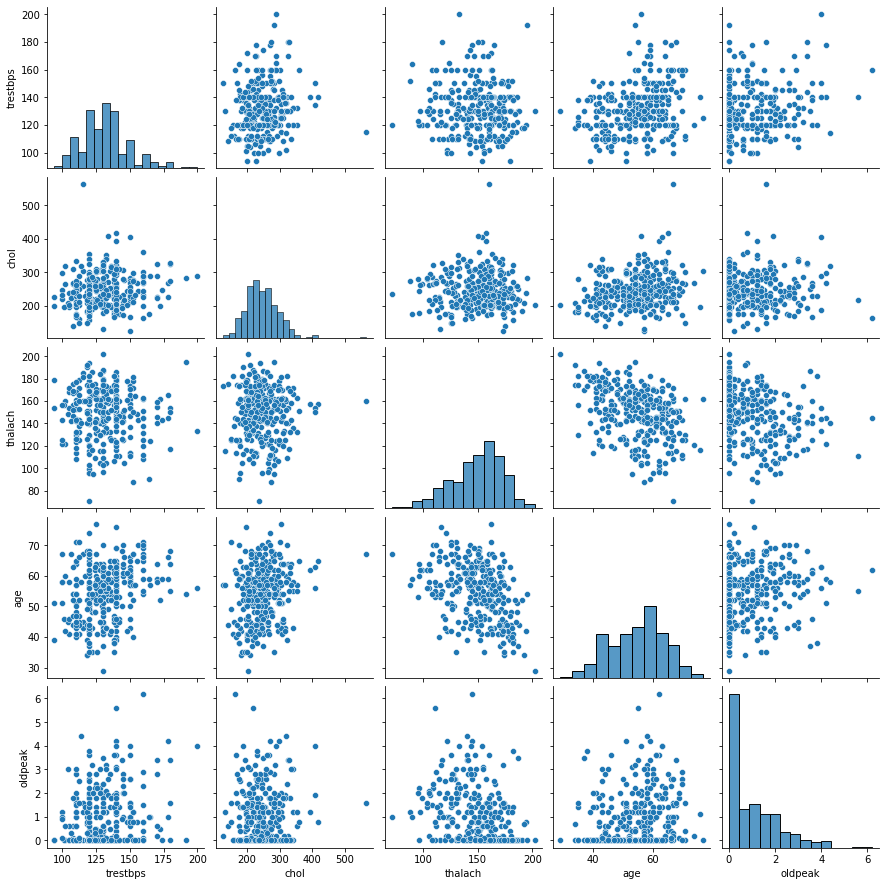

In [ ]:
numeric_columns = ['trestbps','chol','thalach','age','oldpeak']
sns.pairplot(heart[numeric_columns])

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



1    165
0    138
Name: target, dtype: int64


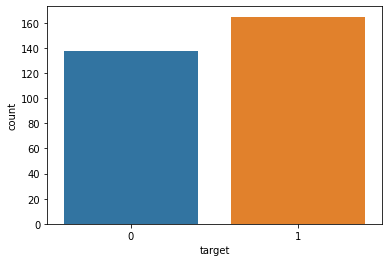

In [ ]:
y=heart['target']
sns.countplot(y)
target_temp = heart.target.value_counts()
print(target_temp)

Correlation

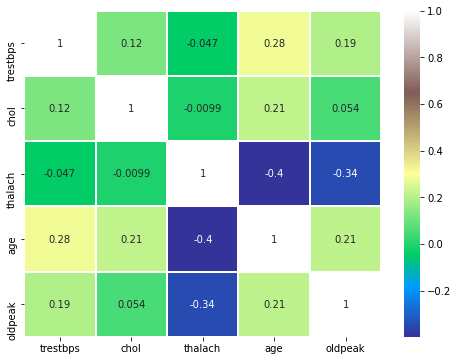

In [ ]:
sns.heatmap(heart[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (

<function matplotlib.pyplot.show(close=None, block=None)>

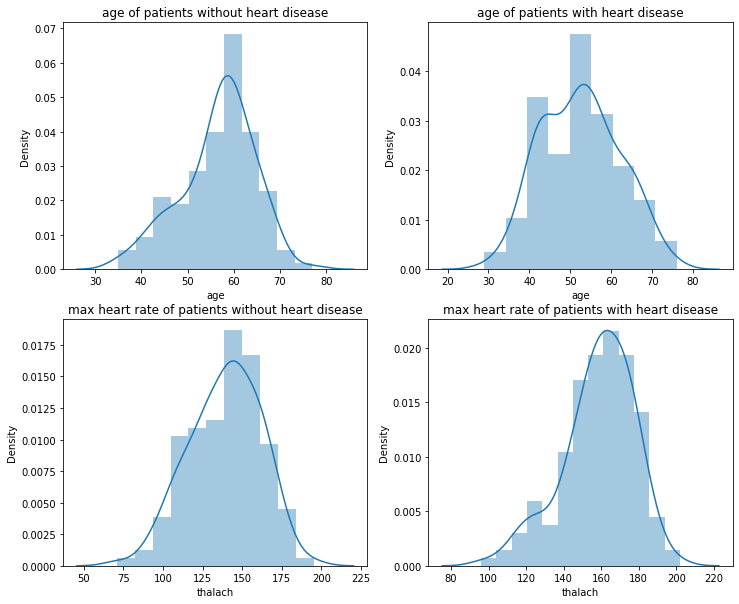

In [ ]:
#create for distplot
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach)
plt.title('max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach)
plt.title('max heart rate of patients with heart disease')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

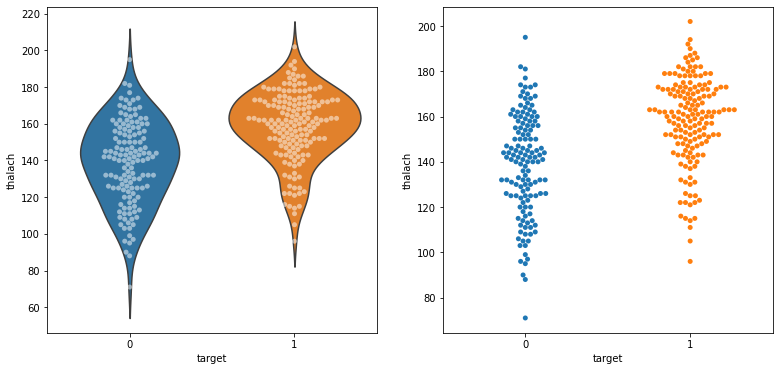

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x='target',y='thalach',data=heart,inner=None)
sns.swarmplot(x='target',y='thalach',data=heart,color='w',alpha=0.5)
plt.subplot(122)
sns.swarmplot(x='target',y='thalach',data=heart)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

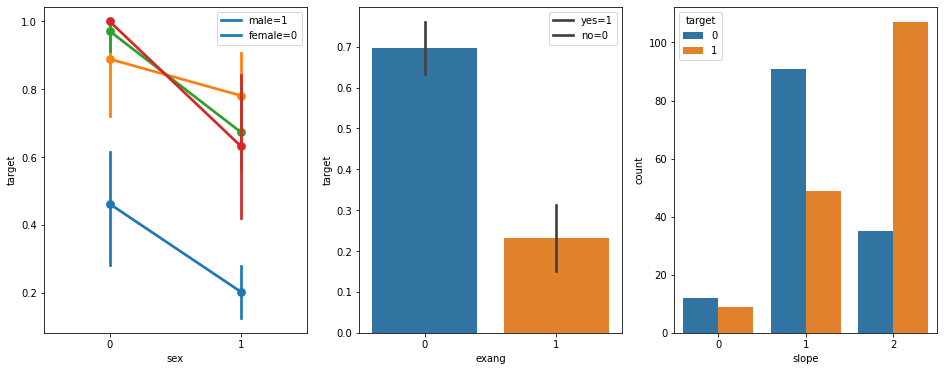

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x='sex',y='target',hue='cp',data=heart)
plt.legend(['male=1','female=0'])
plt.subplot(132)
sns.barplot(x='exang',y='target',data=heart)
plt.legend(['yes=1','no=0'])
plt.subplot(133)
sns.countplot(x='slope',hue='target',data=heart)
plt.show

In [ ]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
heart['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [ ]:
heart['target'].sum()

165

In [ ]:
heart['target'].unique()

array([1, 0], dtype=int64)

In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
x,y=heart.loc[:,:'thal'],heart.loc[:,'target']
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
x.shape

(303, 13)

In [ ]:
y.shape

(303,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x=heart.drop(['target'],axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [ ]:
print('train_set_x_shape:'+str(x_train.shape))
print('train_set_x_shape:'+str(y_train.shape))
print('train_set_x_shape:'+str(x_test.shape))
print('train_set_x_shape:'+str(y_test.shape))

train_set_x_shape:(212, 13)
train_set_x_shape:(212,)
train_set_x_shape:(91, 13)
train_set_x_shape:(91,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,prediction)*100
accuracy_dt

73.62637362637363

In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [ ]:
x_dt = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
x_dt_prediction =dt.predict(x_dt)
x_dt_prediction[0]

1

In [ ]:
category=['no..but i pray you dont get heart disease or corona virus soon...','yes you have heart disease']
print(category[int(x_dt_prediction[0])])

yes you have heart disease


In [ ]:
print('feature importance:\n{}'.format(dt.feature_importances_))

feature importance:
[0.06422528 0.03461456 0.33832546 0.06825922 0.08967398 0.
 0.         0.10693767 0.06667809 0.05350611 0.05980535 0.10975468
 0.0082196 ]


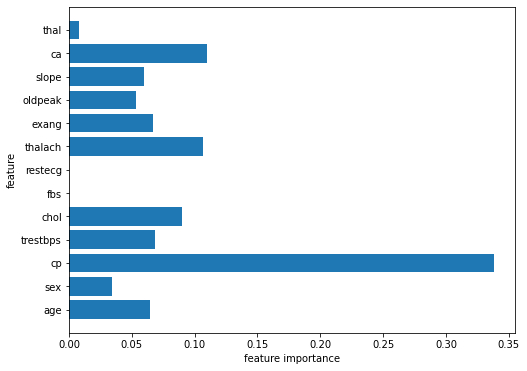

In [ ]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),x)
    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1,n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

K-NEIGHBOR CLASSIFIER(KNN)

In [ ]:
sc =StandardScaler().fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [ ]:
x_test_std

array([[ 0.18111199, -1.35154233, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132],
       [ 0.39865161,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [ 1.05127045,  0.73989544,  0.97963397, ..., -0.6067969 ,
        -0.67157686,  1.22676132],
       ...,
       [ 0.2898818 ,  0.73989544,  0.97963397, ..., -0.6067969 ,
         0.33105902,  1.22676132],
       [-0.25396724,  0.73989544,  0.00459922, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [ 0.61619122,  0.73989544, -0.97043553, ..., -0.6067969 ,
         1.33369489,  1.22676132]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
prediction_knn = knn.predict(x_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [ ]:
accuracy_knn

84.61538461538461

In [ ]:
print('accuracy on training set:{:.3f}'.format(knn.score(x_train,y_train)))
print('accuracy on test set:{:.3f}'.format(knn.score(x_test,y_test)))

accuracy on training set:0.373
accuracy on test set:0.516


In [ ]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    prediction_knn=knn.predict(x_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [ ]:
scores

{1: 0.7692307692307693,
 2: 0.8241758241758241,
 3: 0.8241758241758241,
 4: 0.8461538461538461,
 5: 0.8131868131868132,
 6: 0.8131868131868132,
 7: 0.8131868131868132,
 8: 0.8351648351648352,
 9: 0.7802197802197802,
 10: 0.7912087912087912,
 11: 0.7912087912087912,
 12: 0.7802197802197802,
 13: 0.7912087912087912,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7912087912087912,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7692307692307693,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7802197802197802,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

In [ ]:
x_knn = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
x_knn_std = sc.transform(x_knn)
x_knn_prediction = dt.predict(x_knn)
x_knn_std

array([[ 0.94250064,  0.73989544,  1.95466871,  0.75961822, -0.30064937,
         2.37170825, -0.9841849 ,  0.01848325, -0.6723502 ,  1.10653103,
        -2.1949567 , -0.67157686, -2.06530703]])

In [ ]:
x_knn_prediction[0]

1

In [ ]:
category=['no..but i pray you dont get heart disease or corona virus soon...','yes you have heart disease']
print(category[int(x_dt_prediction[0])])

yes you have heart disease


In [ ]:
algorithms = ['decision tree','knn']
scores = [accuracy_dt,accuracy_knn]

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='algorithms', ylabel='ccuracy score'>

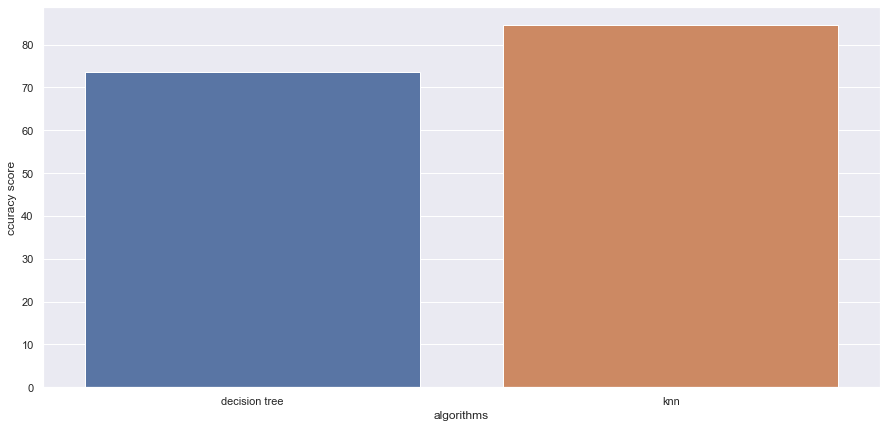

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel('algorithms')
plt.ylabel('ccuracy score')
sns.barplot(algorithms,scores)